In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r England_2018

In [5]:
England_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
12,12,MM Ali (ENG),24,17,1,277,46,17.31,308,89.93,...,1000,29,4/46,34.48,5.10,40.5,1,0,5,0
28,28,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,118.22,...,-,-,-,-,-,-,-,-,5,0
30,30,JT Ball (ENG),2,2,1,1,1*,1.00,12,8.33,...,87,0,-,-,5.80,-,0,0,1,0
36,36,SW Billings (ENG),2,2,0,23,12,11.50,32,71.87,...,-,-,-,-,-,-,-,-,3,0
44,44,JC Buttler (ENG),23,18,5,671,110*,51.61,591,113.53,...,-,-,-,-,-,-,-,-,26,9
68,68,SM Curran (ENG),2,2,0,17,15,8.50,29,58.62,...,90,2,2/44,45.00,7.50,36.0,0,0,0,0
69,69,TK Curran (ENG),10,6,5,71,35,71.00,62,114.51,...,453,17,5/35,26.64,6.23,25.6,0,1,4,0
74,74,LA Dawson (ENG),2,1,0,4,4,4.00,4,100.00,...,26,1,1/26,26.00,4.33,36.0,0,0,0,0
107,107,AD Hales (ENG),14,14,1,457,147,35.15,498,91.76,...,-,-,-,-,-,-,-,-,6,0
198,198,EJG Morgan (ENG),22,22,4,756,92,42.00,806,93.79,...,-,-,-,-,-,-,-,-,5,0


In [6]:
England_2018=England_2018.reset_index()

In [7]:
England_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,12,12,MM Ali (ENG),24,17,1,277,46,17.31,308,...,1000,29,4/46,34.48,5.10,40.5,1,0,5,0
1,28,28,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,...,-,-,-,-,-,-,-,-,5,0
2,30,30,JT Ball (ENG),2,2,1,1,1*,1.00,12,...,87,0,-,-,5.80,-,0,0,1,0
3,36,36,SW Billings (ENG),2,2,0,23,12,11.50,32,...,-,-,-,-,-,-,-,-,3,0
4,44,44,JC Buttler (ENG),23,18,5,671,110*,51.61,591,...,-,-,-,-,-,-,-,-,26,9
5,68,68,SM Curran (ENG),2,2,0,17,15,8.50,29,...,90,2,2/44,45.00,7.50,36.0,0,0,0,0
6,69,69,TK Curran (ENG),10,6,5,71,35,71.00,62,...,453,17,5/35,26.64,6.23,25.6,0,1,4,0
7,74,74,LA Dawson (ENG),2,1,0,4,4,4.00,4,...,26,1,1/26,26.00,4.33,36.0,0,0,0,0
8,107,107,AD Hales (ENG),14,14,1,457,147,35.15,498,...,-,-,-,-,-,-,-,-,6,0
9,198,198,EJG Morgan (ENG),22,22,4,756,92,42.00,806,...,-,-,-,-,-,-,-,-,5,0


In [8]:
England_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
England_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),24,17,1,277,46,17.31,308,89.93,0,...,1000,29,4/46,34.48,5.10,40.5,1,0,5,0
1,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,118.22,4,...,-,-,-,-,-,-,-,-,5,0
2,JT Ball (ENG),2,2,1,1,1*,1.00,12,8.33,0,...,87,0,-,-,5.80,-,0,0,1,0
3,SW Billings (ENG),2,2,0,23,12,11.50,32,71.87,0,...,-,-,-,-,-,-,-,-,3,0
4,JC Buttler (ENG),23,18,5,671,110*,51.61,591,113.53,2,...,-,-,-,-,-,-,-,-,26,9
5,SM Curran (ENG),2,2,0,17,15,8.50,29,58.62,0,...,90,2,2/44,45.00,7.50,36.0,0,0,0,0
6,TK Curran (ENG),10,6,5,71,35,71.00,62,114.51,0,...,453,17,5/35,26.64,6.23,25.6,0,1,4,0
7,LA Dawson (ENG),2,1,0,4,4,4.00,4,100.00,0,...,26,1,1/26,26.00,4.33,36.0,0,0,0,0
8,AD Hales (ENG),14,14,1,457,147,35.15,498,91.76,1,...,-,-,-,-,-,-,-,-,6,0
9,EJG Morgan (ENG),22,22,4,756,92,42.00,806,93.79,0,...,-,-,-,-,-,-,-,-,5,0


In [10]:
England_2018_players =England_2018.copy()

In [11]:
England_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
England_2018_players.HS=England_2018_players.HS.str.extract('(\d+)')
England_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
England_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,24,17,1,277,46,17.31,308,89.93,0,0,...,1000,29,4/46,34.48,5.10,40.5,1,0,5,0
1,22,22,0,1025,139,46.59,867,118.22,4,2,...,-,-,-,-,-,-,-,-,5,0
2,2,2,1,1,1,1.00,12,8.33,0,0,...,87,0,-,-,5.80,-,0,0,1,0
3,2,2,0,23,12,11.50,32,71.87,0,0,...,-,-,-,-,-,-,-,-,3,0
4,23,18,5,671,110,51.61,591,113.53,2,4,...,-,-,-,-,-,-,-,-,26,9
5,2,2,0,17,15,8.50,29,58.62,0,0,...,90,2,2/44,45.00,7.50,36.0,0,0,0,0
6,10,6,5,71,35,71.00,62,114.51,0,0,...,453,17,5/35,26.64,6.23,25.6,0,1,4,0
7,2,1,0,4,4,4.00,4,100.00,0,0,...,26,1,1/26,26.00,4.33,36.0,0,0,0,0
8,14,14,1,457,147,35.15,498,91.76,1,3,...,-,-,-,-,-,-,-,-,6,0
9,22,22,4,756,92,42.00,806,93.79,0,7,...,-,-,-,-,-,-,-,-,5,0


In [14]:
England_2018_players.replace("-",0,inplace=True)

In [15]:
England_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

England_2018_players_scaled = pd.DataFrame(scaler.fit_transform(England_2018_players),columns=England_2018_players.columns)
England_2018_players_scaled.shape
England_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.317926,0.929955,-0.452679,-0.024899,-0.207976,-0.445607,0.043480,0.120512,-0.509902,-0.680301,...,1.163975,2.115331,1.864820,0.143455,0.399053,0.298799,1.137147,-0.223607,-0.056356,-0.223607
1,1.087289,1.551900,-0.927991,2.135970,1.550366,0.958919,1.653611,1.011659,2.784849,0.340151,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.056356,-0.223607
2,-1.219081,-0.935878,-0.452679,-0.822225,-1.058787,-1.227978,-0.809112,-2.449924,-0.509902,-0.680301,...,-0.581988,-0.557833,-0.681537,-0.808459,0.641654,-0.843866,-0.454859,-0.223607,-0.732633,-0.223607
3,-1.219081,-0.935878,-0.927991,-0.758670,-0.850811,-0.724306,-0.751504,-0.448386,-0.509902,-0.680301,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.394495,-0.223607
4,1.202607,1.054344,1.448572,1.113312,1.002066,1.199723,0.858627,0.863922,1.137474,1.360603,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,3.494097,4.472136


In [17]:
England_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,3.436405e-17,2.114711e-17,3.172066e-17,6.344132e-17,-1.057355e-17,2.114711e-17,-5.286776e-17,-2.379049e-16,-4.229421e-17,6.344132e-17,...,4.229421e-17,3.172066e-17,-1.586033e-17,7.401487e-17,-1.215959e-16,-5.815454e-17,-3.172066e-17,-3.172066e-17,4.229421e-17,-7.401487e-17
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,...,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00
min,-1.334400e+00,-1.184656e+00,-9.279914e-01,-8.251140e-01,-1.077694e+00,-1.275947e+00,-8.436765e-01,-2.712323e+00,-5.099020e-01,-6.803013e-01,...,-5.819877e-01,-8.125594e-01,-6.815372e-01,-8.084590e-01,-1.368466e+00,-8.438664e-01,-4.548588e-01,-2.236068e-01,-9.017024e-01,-2.236068e-01
25%,-1.219081e+00,-9.358784e-01,-9.279914e-01,-7.760034e-01,-8.508108e-01,-8.682125e-01,-7.659063e-01,-2.899390e-01,-5.099020e-01,-6.803013e-01,...,-5.819877e-01,-8.125594e-01,-6.815372e-01,-8.084590e-01,-1.368466e+00,-8.438664e-01,-4.548588e-01,-2.236068e-01,-5.635640e-01,-2.236068e-01
50%,4.942221e-02,-3.139339e-01,-4.526787e-01,-5.044503e-01,-2.079760e-01,-1.438836e-01,-5.383564e-01,1.781575e-01,-5.099020e-01,-6.803013e-01,...,-5.819877e-01,-5.490492e-01,-5.937318e-01,-7.326561e-02,4.822307e-01,-1.103032e-01,-4.548588e-01,-2.236068e-01,-2.254256e-01,-2.236068e-01
75%,1.087289e+00,9.299551e-01,4.979466e-01,4.950959e-01,6.617418e-01,7.387424e-01,5.907519e-01,6.862596e-01,-5.099020e-01,3.401507e-01,...,5.819877e-01,5.137751e-01,4.599331e-01,1.434549e-01,7.317627e-01,2.367286e-01,-4.548588e-01,-2.236068e-01,1.127128e-01,-2.236068e-01
max,1.317926e+00,1.800677e+00,2.874510e+00,2.135970e+00,2.325550e+00,2.129838e+00,2.402510e+00,1.337689e+00,2.784849e+00,2.891281e+00,...,2.909938e+00,2.566226e+00,3.006290e+00,3.056621e+00,1.352127e+00,2.936806e+00,2.729153e+00,4.472136e+00,3.494097e+00,4.472136e+00


In [18]:
X =  England_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 1.31792557,  0.92995511, -0.45267873, -0.02489924, -0.20797598,
        -0.44560733,  0.04348   ,  0.12051168, -0.50990195, -0.68030134,
         0.42399915, -0.07260229, -0.04892894, -1.40257113,  1.31792557,
         2.17887415,  2.29883954,  1.16397539,  2.11533132,  1.86481968,
         0.14345494,  0.39905329,  0.29879938,  1.13714707, -0.2236068 ,
        -0.0563564 , -0.2236068 ],
       [ 1.0872886 ,  1.55189961, -0.9279914 ,  2.13596957,  1.55036641,
         0.95891919,  1.65361143,  1.0116591 ,  2.78484912,  0.34015067,
         0.42399915,  2.72258587,  2.80525942, -1.27544302,  1.0872886 ,
        -0.88041717, -0.77849775, -0.5819877 , -0.81255938, -0.68153724,
        -0.80845901, -1.36846563, -0.84386641, -0.45485883, -0.2236068 ,
        -0.0563564 , -0.2236068 ],
       [-1.21908115, -0.93587839, -0.45267873, -0.82222516, -1.05878681,
        -1.22797849, -0.80911196, -2.44992415, -0.50990195, -0.68030134,
         0.42399915, -0.77845789, -0.73393415, -1.2595

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(England_2018_players_scaled))

False

In [23]:
England_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.317926,0.929955,-0.452679,-0.024899,-0.207976,-0.445607,0.043480,0.120512,-0.509902,-0.680301,...,1.163975,2.115331,1.864820,0.143455,0.399053,0.298799,1.137147,-0.223607,-0.056356,-0.223607
1,1.087289,1.551900,-0.927991,2.135970,1.550366,0.958919,1.653611,1.011659,2.784849,0.340151,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.056356,-0.223607
2,-1.219081,-0.935878,-0.452679,-0.822225,-1.058787,-1.227978,-0.809112,-2.449924,-0.509902,-0.680301,...,-0.581988,-0.557833,-0.681537,-0.808459,0.641654,-0.843866,-0.454859,-0.223607,-0.732633,-0.223607
3,-1.219081,-0.935878,-0.927991,-0.758670,-0.850811,-0.724306,-0.751504,-0.448386,-0.509902,-0.680301,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.394495,-0.223607
4,1.202607,1.054344,1.448572,1.113312,1.002066,1.199723,0.858627,0.863922,1.137474,1.360603,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,3.494097,4.472136
5,-1.219081,-0.935878,-0.927991,-0.776003,-0.794090,-0.868212,-0.760146,-0.865767,-0.509902,-0.680301,...,-0.581988,-0.549049,-0.505926,0.433888,1.230827,0.171837,-0.454859,-0.223607,-0.901702,-0.223607
6,-0.296533,-0.438323,1.448572,-0.620005,-0.415952,2.129838,-0.665093,0.894792,-0.509902,-0.680301,...,0.581988,0.513775,0.811155,-0.072990,0.790680,-0.121589,-0.454859,4.472136,-0.225426,-0.223607
7,-1.219081,-1.060267,-0.927991,-0.813559,-1.002066,-1.084072,-0.832155,0.437721,-0.509902,-0.680301,...,-0.581988,-0.736434,-0.593732,-0.090658,0.132193,0.171837,-0.454859,-0.223607,-0.901702,-0.223607
8,0.164741,0.556788,-0.452679,0.495096,1.701622,0.410156,0.590752,0.178157,0.313786,0.850377,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,0.112713,-0.223607
9,1.087289,1.551900,0.973259,1.358866,0.661742,0.738742,1.477908,0.242103,-0.509902,2.891281,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.056356,-0.223607


In [24]:
np.all(np.isfinite(England_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


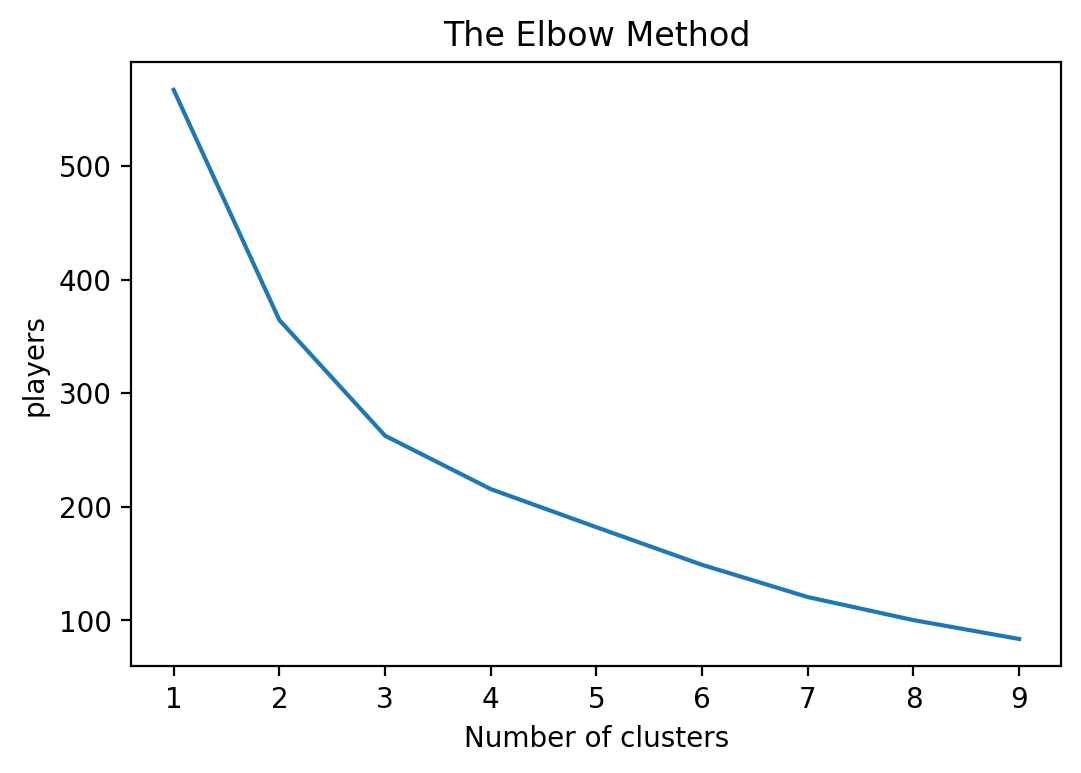

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2])

In [28]:
kmeans.cluster_centers_

array([[-1.21908115, -1.0247276 , -0.79218778, -0.79168577, -0.89402662,
        -0.91960762, -0.79800193, -0.60903849, -0.50990195, -0.68030134,
        -0.52999894, -0.74215674, -0.7176245 , -0.25728308, -1.21908115,
        -0.70940089, -0.6525709 , -0.5819877 , -0.66407349, -0.63136272,
        -0.1458739 ,  0.1930903 , -0.16673113, -0.45485883, -0.2236068 ,
        -0.75678591, -0.2236068 ],
       [ 0.99118986,  1.34458477,  0.4979466 ,  1.46142028,  1.38335539,
         0.92342228,  1.43182231,  0.47069156,  1.27475488,  1.19052735,
         1.16599767,  1.42381157,  1.32108147, -0.28755167,  0.99118986,
        -0.61439184, -0.66201542, -0.5819877 , -0.67592448, -0.65226877,
        -0.16427904, -1.00687516, -0.21375441, -0.45485883, -0.2236068 ,
         0.98623696,  0.55901699],
       [ 0.32330362, -0.11180193,  0.31970435, -0.40334017, -0.25524325,
         0.11208996, -0.37561504,  0.17989001, -0.50990195, -0.29763184,
        -0.41074918, -0.41847153, -0.36288966,  0.4407

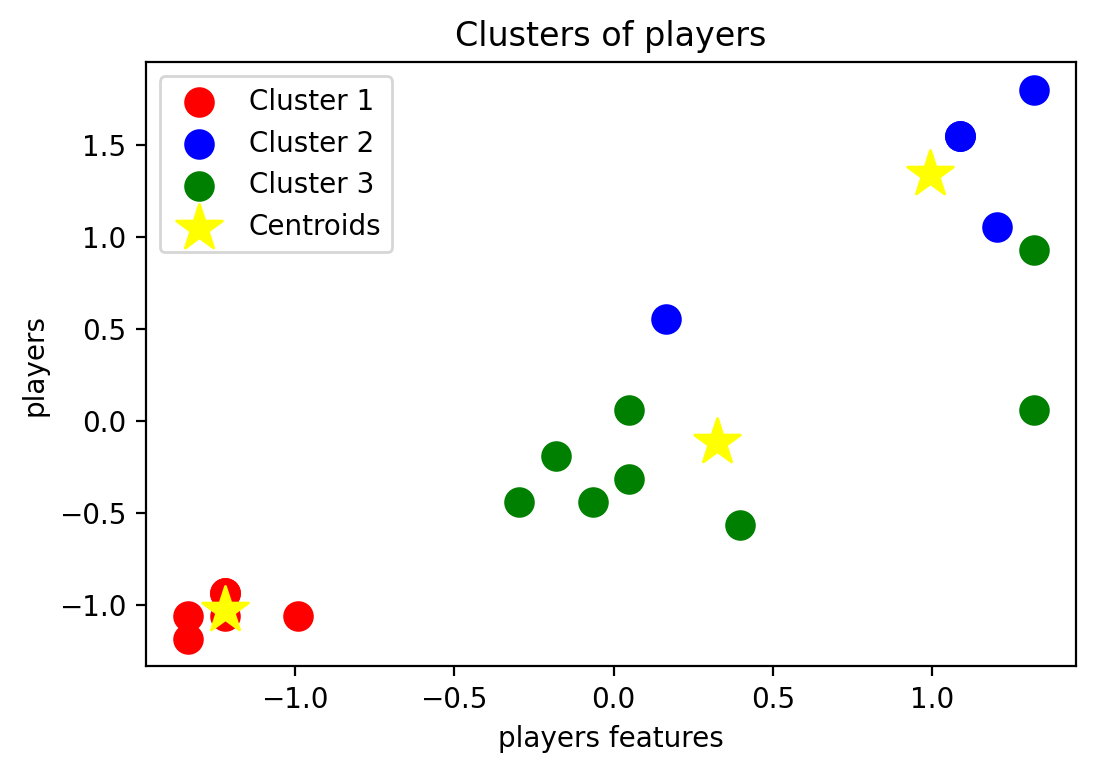

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
England_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),24,17,1,277,46,17.31,308,89.93,0,...,1000,29,4/46,34.48,5.10,40.5,1,0,5,0
1,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,118.22,4,...,-,-,-,-,-,-,-,-,5,0
2,JT Ball (ENG),2,2,1,1,1*,1.00,12,8.33,0,...,87,0,-,-,5.80,-,0,0,1,0
3,SW Billings (ENG),2,2,0,23,12,11.50,32,71.87,0,...,-,-,-,-,-,-,-,-,3,0
4,JC Buttler (ENG),23,18,5,671,110*,51.61,591,113.53,2,...,-,-,-,-,-,-,-,-,26,9
5,SM Curran (ENG),2,2,0,17,15,8.50,29,58.62,0,...,90,2,2/44,45.00,7.50,36.0,0,0,0,0
6,TK Curran (ENG),10,6,5,71,35,71.00,62,114.51,0,...,453,17,5/35,26.64,6.23,25.6,0,1,4,0
7,LA Dawson (ENG),2,1,0,4,4,4.00,4,100.00,0,...,26,1,1/26,26.00,4.33,36.0,0,0,0,0
8,AD Hales (ENG),14,14,1,457,147,35.15,498,91.76,1,...,-,-,-,-,-,-,-,-,6,0
9,EJG Morgan (ENG),22,22,4,756,92,42.00,806,93.79,0,...,-,-,-,-,-,-,-,-,5,0


In [31]:
England_2018["cluster"] = y_kmeans

In [32]:
England_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),24,17,1,277,46,17.31,308,89.93,0,...,29,4/46,34.48,5.10,40.5,1,0,5,0,2
1,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,118.22,4,...,-,-,-,-,-,-,-,5,0,1
2,JT Ball (ENG),2,2,1,1,1*,1.00,12,8.33,0,...,0,-,-,5.80,-,0,0,1,0,0
3,SW Billings (ENG),2,2,0,23,12,11.50,32,71.87,0,...,-,-,-,-,-,-,-,3,0,0
4,JC Buttler (ENG),23,18,5,671,110*,51.61,591,113.53,2,...,-,-,-,-,-,-,-,26,9,1
5,SM Curran (ENG),2,2,0,17,15,8.50,29,58.62,0,...,2,2/44,45.00,7.50,36.0,0,0,0,0,0
6,TK Curran (ENG),10,6,5,71,35,71.00,62,114.51,0,...,17,5/35,26.64,6.23,25.6,0,1,4,0,2
7,LA Dawson (ENG),2,1,0,4,4,4.00,4,100.00,0,...,1,1/26,26.00,4.33,36.0,0,0,0,0,0
8,AD Hales (ENG),14,14,1,457,147,35.15,498,91.76,1,...,-,-,-,-,-,-,-,6,0,1
9,EJG Morgan (ENG),22,22,4,756,92,42.00,806,93.79,0,...,-,-,-,-,-,-,-,5,0,1


In [33]:
England_2018['cluster'].value_counts()

2    8
0    7
1    6
Name: cluster, dtype: int64

In [34]:
England_Cluster_2018 = np.array([7,6,8])

In [35]:
England_Cluster_2018

array([7, 6, 8])

In [36]:
%store England_Cluster_2018

Stored 'England_Cluster_2018' (ndarray)


In [37]:
England_2018_players_scaled.insert(0, 'Player', England_2018.Player)

In [38]:
England_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),1.317926,0.929955,-0.452679,-0.024899,-0.207976,-0.445607,0.043480,0.120512,-0.509902,...,1.163975,2.115331,1.864820,0.143455,0.399053,0.298799,1.137147,-0.223607,-0.056356,-0.223607
1,JM Bairstow (ENG),1.087289,1.551900,-0.927991,2.135970,1.550366,0.958919,1.653611,1.011659,2.784849,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.056356,-0.223607
2,JT Ball (ENG),-1.219081,-0.935878,-0.452679,-0.822225,-1.058787,-1.227978,-0.809112,-2.449924,-0.509902,...,-0.581988,-0.557833,-0.681537,-0.808459,0.641654,-0.843866,-0.454859,-0.223607,-0.732633,-0.223607
3,SW Billings (ENG),-1.219081,-0.935878,-0.927991,-0.758670,-0.850811,-0.724306,-0.751504,-0.448386,-0.509902,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.394495,-0.223607
4,JC Buttler (ENG),1.202607,1.054344,1.448572,1.113312,1.002066,1.199723,0.858627,0.863922,1.137474,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,3.494097,4.472136
5,SM Curran (ENG),-1.219081,-0.935878,-0.927991,-0.776003,-0.794090,-0.868212,-0.760146,-0.865767,-0.509902,...,-0.581988,-0.549049,-0.505926,0.433888,1.230827,0.171837,-0.454859,-0.223607,-0.901702,-0.223607
6,TK Curran (ENG),-0.296533,-0.438323,1.448572,-0.620005,-0.415952,2.129838,-0.665093,0.894792,-0.509902,...,0.581988,0.513775,0.811155,-0.072990,0.790680,-0.121589,-0.454859,4.472136,-0.225426,-0.223607
7,LA Dawson (ENG),-1.219081,-1.060267,-0.927991,-0.813559,-1.002066,-1.084072,-0.832155,0.437721,-0.509902,...,-0.581988,-0.736434,-0.593732,-0.090658,0.132193,0.171837,-0.454859,-0.223607,-0.901702,-0.223607
8,AD Hales (ENG),0.164741,0.556788,-0.452679,0.495096,1.701622,0.410156,0.590752,0.178157,0.313786,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,0.112713,-0.223607
9,EJG Morgan (ENG),1.087289,1.551900,0.973259,1.358866,0.661742,0.738742,1.477908,0.242103,-0.509902,...,-0.581988,-0.812559,-0.681537,-0.808459,-1.368466,-0.843866,-0.454859,-0.223607,-0.056356,-0.223607


In [39]:
England_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MM Ali (ENG),-0.445607,0.143455
1,JM Bairstow (ENG),0.958919,-0.808459
2,JT Ball (ENG),-1.227978,-0.808459
3,SW Billings (ENG),-0.724306,-0.808459
4,JC Buttler (ENG),1.199723,-0.808459
5,SM Curran (ENG),-0.868212,0.433888
6,TK Curran (ENG),2.129838,-0.072990
7,LA Dawson (ENG),-1.084072,-0.090658
8,AD Hales (ENG),0.410156,-0.808459
9,EJG Morgan (ENG),0.738742,-0.808459


In [40]:
England_2018_Ave=England_2018_players_scaled.mean()

In [41]:
England_2018_Ave

Mat_x           3.436405e-17
Inns_x          2.114711e-17
NO              3.172066e-17
Runs_x          6.344132e-17
HS             -1.057355e-17
Ave_x           2.114711e-17
BF             -5.286776e-17
SR_x           -2.379049e-16
100            -4.229421e-17
50              6.344132e-17
0              -5.286776e-17
4s             -3.172066e-17
6s             -9.516197e-17
Unnamed: 0_y    2.114711e-17
Mat_y           3.436405e-17
Inns_y          2.114711e-17
Overs           1.057355e-17
Mdns            4.229421e-17
Runs_y          3.172066e-17
Wkts           -1.586033e-17
Ave_y           7.401487e-17
Econ           -1.215959e-16
SR_y           -5.815454e-17
4              -3.172066e-17
5              -3.172066e-17
Ct              4.229421e-17
St             -7.401487e-17
dtype: float64

In [42]:
England_Ave_2018 =England_2018_Ave[['Ave_x','Ave_y']]

In [43]:
England_Ave_2018

Ave_x    2.114711e-17
Ave_y    7.401487e-17
dtype: float64

In [44]:
England_Ave_2018 = np.array([England_Ave_2018.Ave_x, England_Ave_2018.Ave_y])

In [45]:
England_Ave_2018

array([2.11471052e-17, 7.40148683e-17])

In [46]:
%store England_Ave_2018

Stored 'England_Ave_2018' (ndarray)


In [47]:
England_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),24,17,1,277,46,17.31,308,89.93,0,...,29,4/46,34.48,5.10,40.5,1,0,5,0,2
1,JM Bairstow (ENG),22,22,0,1025,139,46.59,867,118.22,4,...,-,-,-,-,-,-,-,5,0,1
2,JT Ball (ENG),2,2,1,1,1*,1.00,12,8.33,0,...,0,-,-,5.80,-,0,0,1,0,0
3,SW Billings (ENG),2,2,0,23,12,11.50,32,71.87,0,...,-,-,-,-,-,-,-,3,0,0
4,JC Buttler (ENG),23,18,5,671,110*,51.61,591,113.53,2,...,-,-,-,-,-,-,-,26,9,1
5,SM Curran (ENG),2,2,0,17,15,8.50,29,58.62,0,...,2,2/44,45.00,7.50,36.0,0,0,0,0,0
6,TK Curran (ENG),10,6,5,71,35,71.00,62,114.51,0,...,17,5/35,26.64,6.23,25.6,0,1,4,0,2
7,LA Dawson (ENG),2,1,0,4,4,4.00,4,100.00,0,...,1,1/26,26.00,4.33,36.0,0,0,0,0,0
8,AD Hales (ENG),14,14,1,457,147,35.15,498,91.76,1,...,-,-,-,-,-,-,-,6,0,1
9,EJG Morgan (ENG),22,22,4,756,92,42.00,806,93.79,0,...,-,-,-,-,-,-,-,5,0,1
